In [31]:
pip install mp-api pandas matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


Enter minimum band gap (eV):  1
Enter maximum band gap (eV):  1.001


C:\Users\tadic\AppData\Local\Temp\ipykernel_26936\698779826.py:14: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  results = mpr.summary.search(
Retrieving SummaryDoc documents: 100%|███████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 41791.07it/s]


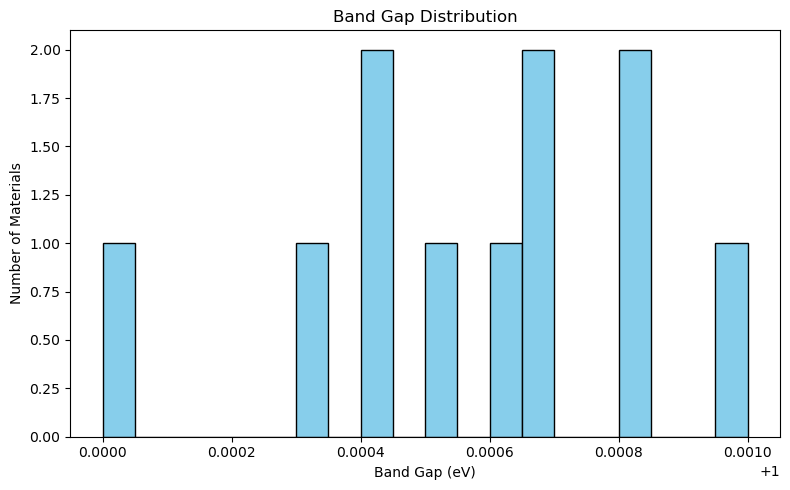

In [2]:
# 2.1 - band gap filter

import os
import numpy as np
from mp_api.client import MPRester
import matplotlib.pyplot as plt
import pandas as pd

API_KEY = "predX42d0PDrOGcfMdmTpLTtvij6k0Ts"

def search_by_band_gap(min_gap, max_gap):
    """Fetch materials with band gaps in the specified range."""
    with MPRester(API_KEY) as mpr:
        results = mpr.summary.search(
            band_gap=(min_gap, max_gap),
            fields=["material_id", "formula_pretty", "band_gap"]
        )

    data = [
        {
            "material_id": doc.material_id,
            "formula_pretty": doc.formula_pretty,
            "band_gap": doc.band_gap
        }
        for doc in results
        if doc.band_gap is not None
    ]

    return pd.DataFrame(data)

def plot_band_gap_histogram(df):
    """Plot a histogram of band gaps."""
    plt.figure(figsize=(8, 5))
    plt.hist(df["band_gap"], bins=20, color="skyblue", edgecolor="black")
    plt.title("Band Gap Distribution")
    plt.xlabel("Band Gap (eV)")
    plt.ylabel("Number of Materials")
    plt.tight_layout()
    plt.show()

def main():
    try:
        min_gap = float(input("Enter minimum band gap (eV): ").strip())
        max_gap = float(input("Enter maximum band gap (eV): ").strip())
    except ValueError:
        return

    if min_gap > max_gap:
        return

    df = search_by_band_gap(min_gap, max_gap)

    if not df.empty:
        plot_band_gap_histogram(df)

if __name__ == "__main__":
    main()
